If there is a high non-linearity & complex relationship between dependent & independent variables, a tree model will outperform a classical regression method. If you need to build a model which is easy to explain to people, a decision tree model will always do better than a linear model

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node (e.g., Outlook) has two or more branches (e.g., Sunny, Overcast and Rainy), each representing values for the attribute tested. Leaf node (e.g., Hours Played) represents a decision on the numerical target. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data. 

Example of tree in regression problem:

<img src="https://miro.medium.com/max/668/0*Mr6cB6yeOTZWFnFs.png"/>

Link: https://medium.com/swlh/decision-tree-classification-de64fc4d5aac


In Classifier DT:

Using the decision algorithm, we start at the tree root and split the data on the feature that results in the largest information gain (IG) (reduction in uncertainty towards the final decision).
In an iterative process, we can then repeat this splitting procedure at each child node until the leaves are pure. This means that the samples at each leaf node all belong to the same class.
In practice, we may set a limit on the depth of the tree to prevent overfitting. We compromise on purity here somewhat as the final leaves may still have some impurity.

In [8]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor

In [56]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [22]:
dataset = pd.read_csv('sample_data/kc_house_data.csv')

In [23]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [25]:
dataset.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [42]:
from sklearn.model_selection import train_test_split

x = dataset[['bedrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement']]
x.head() # price is the target

,bedrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement
0,3,1180,1.0,0,0,3,7,1180,0
1,3,2570,2.0,0,0,3,7,2170,400
2,2,770,1.0,0,0,3,6,770,0
3,4,1960,1.0,0,0,5,7,1050,910
4,3,1680,1.0,0,0,3,8,1680,0


In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, dataset['price'], test_size=0.3, random_state=0)

In [44]:
from sklearn.metrics import r2_score, mean_squared_error

In [45]:
dt = DecisionTreeRegressor(max_depth=4)
# max_depth is the max depth

In [46]:
dt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [49]:
p = dt.predict(x_test) # predict outcome without know the real outcome

In [50]:
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, p))))

RMSE: 236580.9694706001


In [51]:
from sklearn.tree import plot_tree

[Text(558.0, 733.86, 'grade <= 8.5\nmse = 133697018052.424\nsamples = 15129\nvalue = 540606.716'),
 Text(279.0, 570.78, 'sqft_living <= 2028.0\nmse = 39299730330.379\nsamples = 12179\nvalue = 439168.039'),
 Text(139.5, 407.70000000000005, 'grade <= 7.5\nmse = 23497261884.358\nsamples = 8181\nvalue = 383907.144'),
 Text(69.75, 244.62, 'grade <= 6.5\nmse = 19951022504.668\nsamples = 6407\nvalue = 358551.303'),
 Text(34.875, 81.54000000000008, 'mse = 15612241761.079\nsamples = 1582\nvalue = 293187.291'),
 Text(104.625, 81.54000000000008, 'mse = 19513470168.436\nsamples = 4825\nvalue = 379982.571'),
 Text(209.25, 244.62, 'view <= 0.5\nmse = 25596864624.168\nsamples = 1774\nvalue = 475482.609'),
 Text(174.375, 81.54000000000008, 'mse = 22678247892.061\nsamples = 1659\nvalue = 465667.271'),
 Text(244.125, 81.54000000000008, 'mse = 46261576142.597\nsamples = 115\nvalue = 617079.522'),
 Text(418.5, 407.70000000000005, 'view <= 3.5\nmse = 52600222952.589\nsamples = 3998\nvalue = 552246.922'),
 

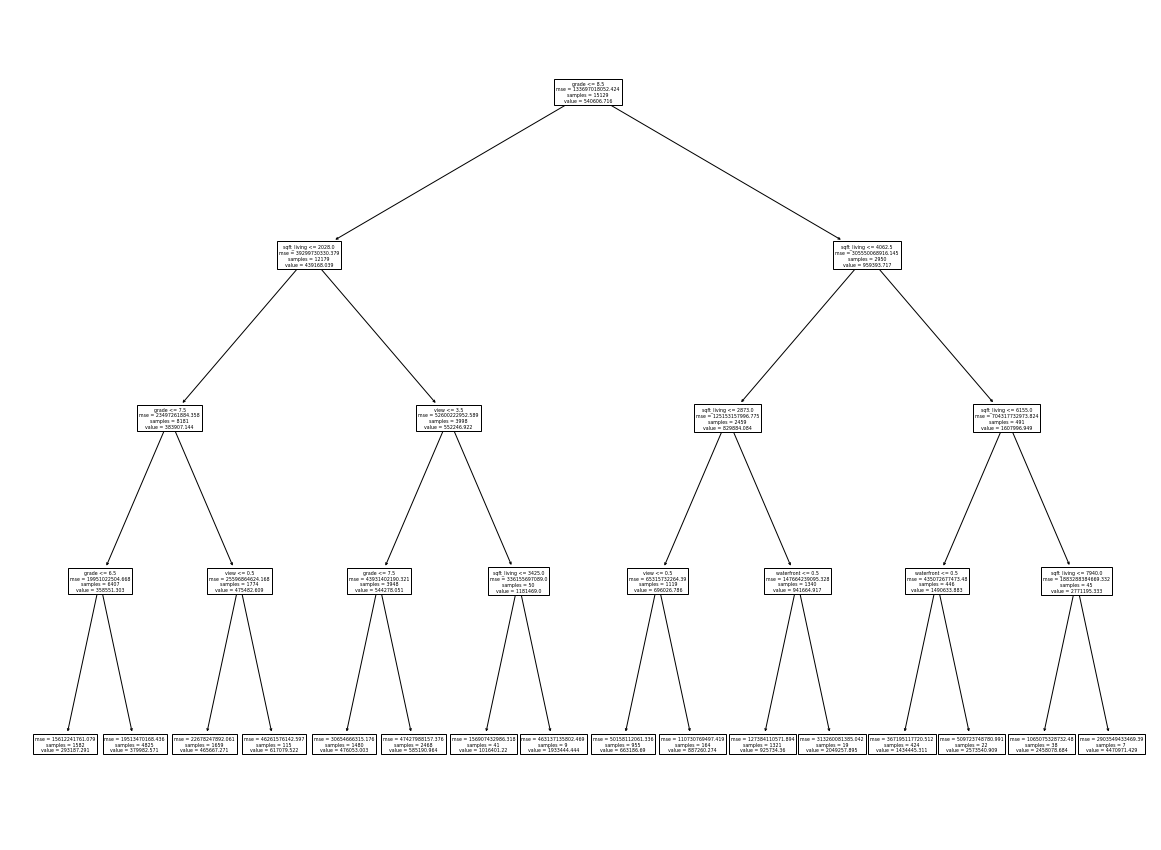

In [62]:
pylab.figure(figsize=(20, 15)) # increase size of the tree plot 
# the more deep the tree, the more the chance of overfit # if we don't specify the depth, the tree is going down and down...
plot_tree(dt, feature_names=x.columns) # to visualize the tree

RMSE: 274450.380481609


[Text(418.5, 453.0, 'grade <= 8.5\nmse = 133697018052.424\nsamples = 15129\nvalue = 540606.716'),
 Text(209.25, 271.8, 'sqft_living <= 2028.0\nmse = 39299730330.379\nsamples = 12179\nvalue = 439168.039'),
 Text(104.625, 90.59999999999997, 'mse = 23497261884.358\nsamples = 8181\nvalue = 383907.144'),
 Text(313.875, 90.59999999999997, 'mse = 52600222952.589\nsamples = 3998\nvalue = 552246.922'),
 Text(627.75, 271.8, 'sqft_living <= 4062.5\nmse = 305550068916.145\nsamples = 2950\nvalue = 959393.717'),
 Text(523.125, 90.59999999999997, 'mse = 125153157996.775\nsamples = 2459\nvalue = 829884.084'),
 Text(732.375, 90.59999999999997, 'mse = 704317732973.824\nsamples = 491\nvalue = 1607996.949')]

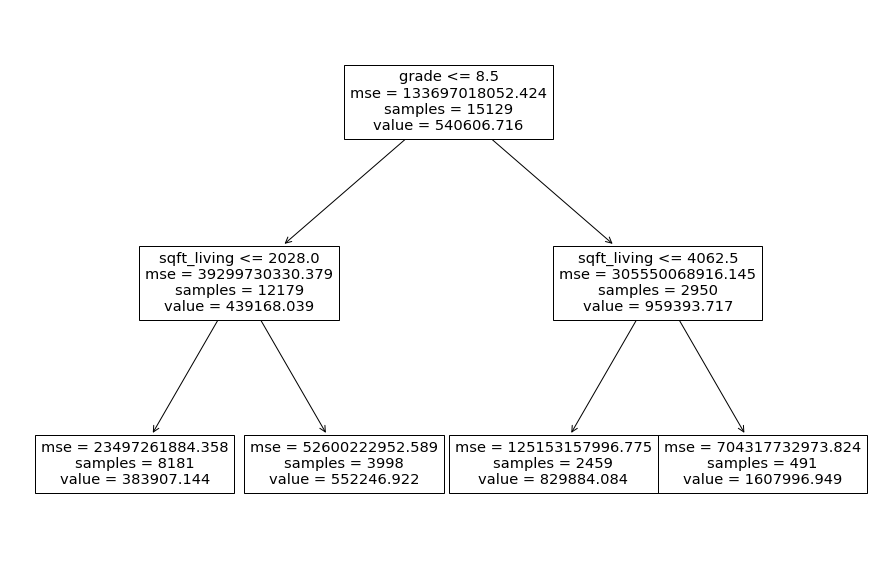

In [61]:
# for each feature, the tree os going tp explore the best cut point
pylab.figure(figsize=(15, 10)) # increase size of the tree plot 
dt2 = DecisionTreeRegressor(max_depth=2) # max depth of 2
dt2.fit(x_train, y_train)
p2 = dt2.predict(x_test) # predict outcome without know the real outcome
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, p2))))
plot_tree(dt2, feature_names=x.columns)

In [81]:
# trying to improve rmse, the less the better
# for each feature, the tree os going tp explore the best cut point
pylab.figure(figsize=(15, 10)) # increase size of the tree plot 
dt3 = DecisionTreeRegressor(max_depth=8) # max depth of 8, gives the best rmse
dt3.fit(x_train, y_train)
p3 = dt3.predict(x_test) # predict outcome without know the real outcome

<Figure size 1080x720 with 0 Axes>

In [82]:
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, p3))))
print('R2: {}'.format(r2_score(y_test, p3)))

RMSE: 224743.43734434026
R2: 0.6321007019916755


[Text(185.74316860465117, 205.35999999999999, 'grade <= 8.5\nmse = 133697018052.424\nsamples = 15129\nvalue = 540606.716'),
 Text(98.3529069767442, 181.2, 'sqft_living <= 2028.0\nmse = 39299730330.379\nsamples = 12179\nvalue = 439168.039'),
 Text(49.41976744186047, 157.04, 'grade <= 7.5\nmse = 23497261884.358\nsamples = 8181\nvalue = 383907.144'),
 Text(25.845348837209304, 132.88, 'grade <= 6.5\nmse = 19951022504.668\nsamples = 6407\nvalue = 358551.303'),
 Text(13.625581395348838, 108.72, 'sqft_living <= 1135.0\nmse = 15612241761.079\nsamples = 1582\nvalue = 293187.291'),
 Text(6.92093023255814, 84.56, 'view <= 0.5\nmse = 10878607627.577\nsamples = 902\nvalue = 268842.113'),
 Text(3.46046511627907, 60.400000000000006, 'grade <= 5.5\nmse = 10012136118.744\nsamples = 858\nvalue = 263711.172'),
 Text(1.730232558139535, 36.24000000000001, 'condition <= 2.5\nmse = 9551582173.616\nsamples = 143\nvalue = 217932.797'),
 Text(0.8651162790697675, 12.079999999999984, 'mse = 9544397500.0\nsamples 

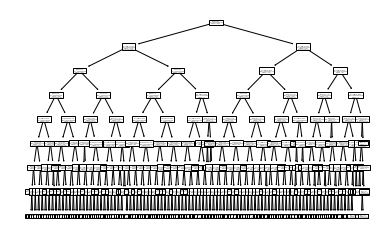

In [83]:
plot_tree(dt3, feature_names=x.columns)

In [101]:
# When i specify the depth, it generalizes better

# another way to specify the depth

# using min_samples_leaf  -> specifies the maximum examples in the final node
# while max_depth is a way to specify depth from top to bottom, min_samples_leaf is a way to specify from bottom to top
# with this parameter, i tell the dt, you can do many depths, but the final nodes, must have this minimum samples
# for each feature, the tree os going tp explore the best cut point

pylab.figure(figsize=(15, 10)) # increase size of the tree plot 
dt4 = DecisionTreeRegressor(min_samples_leaf=8) 
dt4.fit(x_train, y_train)
p4 = dt4.predict(x_test) # predict outcome without know the real outcome
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, p4))))
print('R2: {}'.format(r2_score(y_test, p4)))

RMSE: 230031.98732824865
R2: 0.6145825406125015


<Figure size 1080x720 with 0 Axes>

[Text(250.5203327134109, 213.25846153846155, 'grade <= 8.5\nmse = 133697018052.424\nsamples = 15129\nvalue = 540606.716'),
 Text(183.8934227274119, 204.89538461538461, 'sqft_living <= 2028.0\nmse = 39299730330.379\nsamples = 12179\nvalue = 439168.039'),
 Text(123.96602935721486, 196.53230769230768, 'grade <= 7.5\nmse = 23497261884.358\nsamples = 8181\nvalue = 383907.144'),
 Text(68.61863531865146, 188.16923076923078, 'grade <= 6.5\nmse = 19951022504.668\nsamples = 6407\nvalue = 358551.303'),
 Text(22.197414676934294, 179.80615384615385, 'sqft_living <= 1135.0\nmse = 15612241761.079\nsamples = 1582\nvalue = 293187.291'),
 Text(13.944120226920623, 171.44307692307692, 'view <= 0.5\nmse = 10878607627.577\nsamples = 902\nvalue = 268842.113'),
 Text(8.3610373188736, 163.07999999999998, 'grade <= 5.5\nmse = 10012136118.744\nsamples = 858\nvalue = 263711.172'),
 Text(1.3424952155290257, 154.71692307692308, 'condition <= 2.5\nmse = 9551582173.616\nsamples = 143\nvalue = 217932.797'),
 Text(0.48

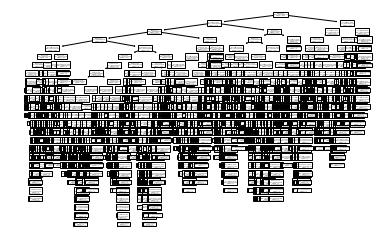

In [102]:
plot_tree(dt4, feature_names=x.columns)